In [2]:
import os

import GEOparse
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data_dir = '../dat/'

In [4]:
gse = GEOparse.get_GEO(filepath=os.path.join(data_dir, 'GSE41037_family.soft'))
clear_output();

Our goal here is just to understand how this GEO parse library organizes the data and what the different fields mean/do. As a starting point, we can look at the metadata to confirm what we already knew. This object contains the data from a genome-wide DNA methylation profiling assay done on whole blood cells. The experiment used the Illumina Infinium 27K chip to obtain methylation profiles across ~27,000 CpGs for all 720 individuals.

In [5]:
gse.metadata

{'title': ['Aging effects on DNA methylation modules in blood tissue'],
 'geo_accession': ['GSE41037'],
 'status': ['Public on Sep 21 2012'],
 'submission_date': ['Sep 20 2012'],
 'last_update_date': ['Oct 07 2019'],
 'pubmed_id': ['23034122', '25424713', '26949191'],
 'summary': ['Genome wide DNA methylation profiling of whole blood in schizophrenia patients and healthy subjects. The Illumina Infinium 27k Human DNA methylation Beadchip v1.2 was used to obtain DNA methylation profiles across approximately 27,000 CpGs. Raw data included 325 schizophrenia patients (2) and 394 controls (1) from Dutch descent. One sample was excluded since it was a bipolar patient, indicated by 3 in diseaseStatus column. The column used_in_analysis shows the samples that were used in our study. The excluded samples failed quality control. Normalized data are also included in the non_normalized.txt (i.e. AVG_Beta column).'],
 'overall_design': ['Bisulphite converted DNA from 720 samples were hybridised to t

In [6]:
len(gse.metadata['sample_id']) # Number of samples - should be ~720.

720

Per the above, each 'sample' corresponds to one of the individuals whose methylation profile was assayed as part of the experiment. As our next step towards enlightenment, let's see if we can get the methylation value (denoted $ \beta $ in the paper) for each individual at each CpG. 

In [7]:
methylation_profile_results = gse.gsms

In [8]:
methylation_profile_results[gse.metadata['sample_id'][0]].table

,ID_REF,VALUE
0,cg00000292,0.826452
1,cg00002426,0.664997
2,cg00003994,0.044991
3,cg00005847,0.157715
4,cg00006414,0.077353
...,...,...
27573,cg27657283,0.081038
27574,cg27661264,0.197167
27575,cg27662379,0.034734
27576,cg27662877,0.077491


We managed to find the data table for one individual's methylation profile. Notice that the methylation probe values are between 0 and 1 as expected.

Now, let's see if we can aggregate the individuals' methylation profiles into a numpy tensor and potentially plot them.

In [9]:
methylation_probe_results = {}
for sample_id in gse.gsms:
    methylation_probe_results[sample_id] = gse.gsms[sample_id].table.VALUE.values.astype(np.float)

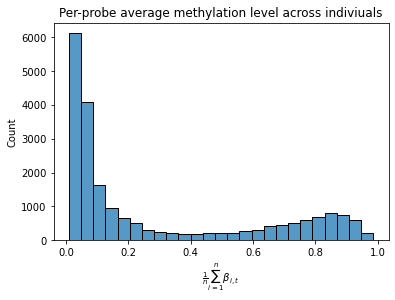

In [12]:
sample_sample_id = gse.metadata['sample_id'][0]
sample_methylation_probe_result = methylation_probe_results[sample_sample_id]
sns.histplot(np.mean([probe_result for probe_result in methylation_probe_results.values()], axis=0))
plt.xlabel("$ \\frac{1}{n} \sum_{i=1}^n \\beta_{i, t} $")
plt.title("Per-probe average methylation level across indiviuals");

We now have a sample-indexed dictionary of methylation probe results and a nice histogram showing the distribution of the mean $ \beta $s across individuals. Let's see if we can also get the individuals' ages. The individuals' information is stored under `gse.phenotype_data` according to the GEOparse docs.

In [13]:
gse.phenotype_data.columns

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.gender',
       'characteristics_ch1.1.age', 'characteristics_ch1.2.diseasestatus',
       'characteristics_ch1.3.tissue',
       'characteristics_ch1.4.used_in_analysis',
       'characteristics_ch1.5.dataset', 'characteristics_ch1.6.plate',
       'characteristics_ch1.7.sentrixbarcode',
       'characteristics_ch1.8.sentrixposition', 'characteristics_ch1.9.wellid',
       'characteristics_ch1.10.trackingsheet', 'molecule_ch1',
       'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1',
       'hyb_protocol', 'scan_protocol', 'description', 'data_processing',
       'platform_id', 'contact_name', 'contact_email', 'contact_laboratory',
       'contact_department', 'contact_institute', 'contact_address',
       'contact_city', 'contact_state', 'contact_zip/postal_code',
       'contact_countr

Text(0.5, 0, 'Age (in years)')

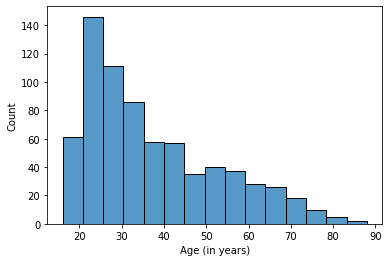

In [14]:
sns.histplot(gse.phenotype_data['characteristics_ch1.1.age'].values.astype(np.int))
plt.xlabel('Age (in years)')